# Análise das Viagens de 2024

In [13]:
ano = 2024
caminho_dados = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/{ano}_Viagem.csv"
caminho_saida_tabela = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/output/Analise_Viagens_{ano}.xlsx"
caminho_saida_grafico = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/output/Grafico_{ano}.png"

In [14]:
import pandas as pd

In [15]:
# Serve para mostrar todas as colunas no gráfico para uma melhor visualização
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

# O "decimal = '," serve para transformar os dados numéricos do arquivo em "float"
df_viagens = pd.read_csv(caminho_dados,encoding='Windows-1252', sep=';', decimal = ',')

In [16]:
# Com o "decimal" faz com que dê certo a soma dos valores
df_viagens["Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]

In [17]:
# Ajuste de valores nulos no "Cargo" para não excluir esses dados nulos
df_viagens["Cargo"] = df_viagens["Cargo"].fillna("CARGO NÃO IDENTIFICADO")

In [18]:
# Transformando as colunas de datas para o formato que é usado aqui no Brasil (estava em formato americano)
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format = "%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format = "%d/%m/%Y")

In [19]:
# Criação de novas colunas para ter uma visualização melhor do mês que foi feita e a viagem e quantos foram os dias de viagem
df_viagens["Mês da viagem"] = df_viagens["Período - Data de início"].dt.month_name()
df_viagens["Dias de viagem"] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [20]:
# Código para a criação da tabela consolidada e filtrada
df_viagens_consolidado = (
    df_viagens
    .groupby("Cargo")
    .agg(
        despesa_media=("Despesas", "mean"),
        duração_media=("Dias de viagem", "mean"),
        despesas_totais=("Despesas", "sum"),
        destino_mais_frequente=("Destinos", pd.Series.mode),
        n_viagens=("Nome", "count")
        )
    .reset_index()
    .sort_values(by="despesas_totais", ascending=False)
    )

In [21]:
# Deixando apenas para os cargos que são maiores que 1% em quantidade de viagens
df_cargos = df_viagens["Cargo"].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos["proportion"] > 0.01, "Cargo"]
filtro = df_viagens_consolidado["Cargo"].isin(cargos_relevantes)
# Chegando na tabela final consolidada e filtrada
df_final = df_viagens_consolidado.loc[filtro].sort_values(by="n_viagens", ascending=False)
# Caminho para o gráfico ficar em excel na pasta "output"
df_final.to_excel(caminho_saida_tabela, index=False)

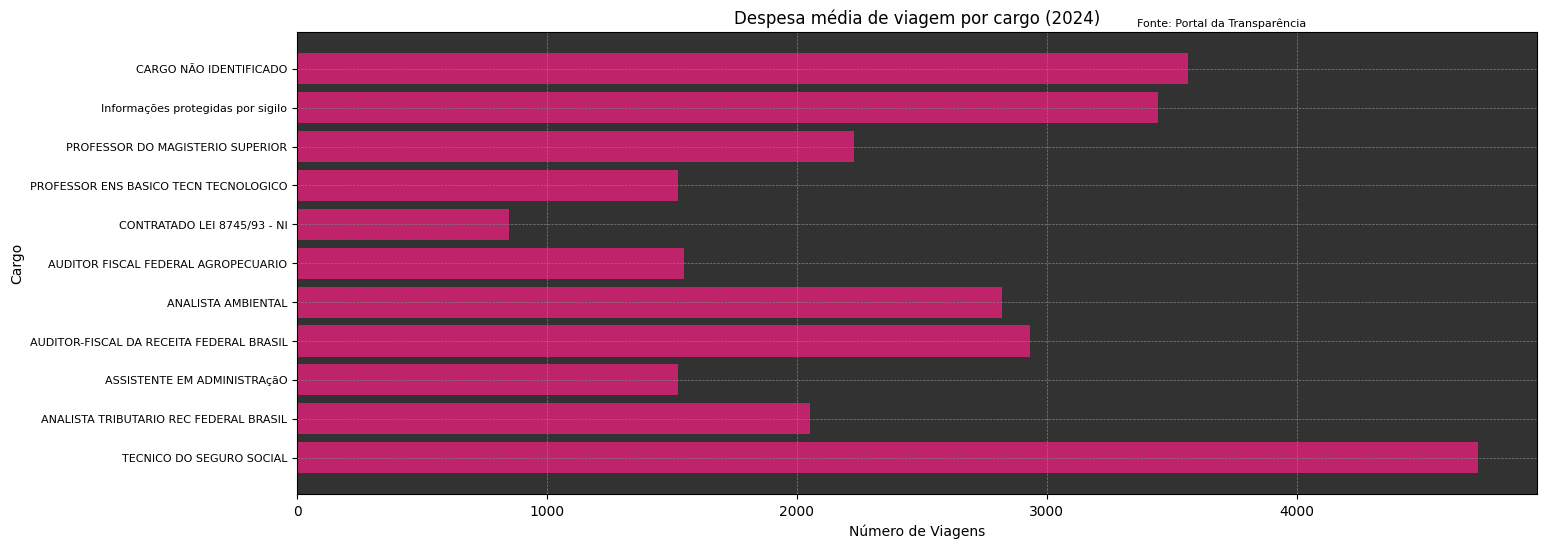

In [22]:
import matplotlib.pyplot as plt

# Criação da figura seca (sem nada)
fig, ax = plt.subplots(figsize=(16,6))

# Colocando as informações essenciais do que quero visualizar: Cargo e número de viagens
ax.barh(df_final["Cargo"], df_final["despesa_media"], color="#bf246b")

ax.invert_yaxis()

# Ajustes de cores, títulos e fonte do gráfico
ax.set_facecolor("#323232")

ax.set_title("Despesa média de viagem por cargo (2024)")

ax.set_xlabel("Número de Viagens")

ax.set_ylabel("Cargo")

plt.grid(color = "gray", linestyle="--", linewidth="0.5")

plt.figtext(0.65, 0.89, "Fonte: Portal da Transparência", fontsize = 8)

plt.yticks(fontsize = 8)

# Código para salvar a figura na pasta "output"
plt.savefig(caminho_saida_grafico,bbox_inches="tight")

# Exibição do gráfico
plt.show()